       Customer ID preferred_payment_method  total_spent  total_addons_spent
0             1000              Credit Card      6279.42               66.30
1             1002                     Cash      5020.60               60.16
2             1003                     Cash        41.50               35.56
3             1004              Credit Card        83.00               65.78
4             1005               Debit Card     11779.11               75.33
...            ...                      ...          ...                 ...
12131        19994            Bank Transfer      5504.87               93.17
12132        19995              Credit Card      5394.56                0.00
12133        19996            Bank Transfer     27296.78              432.12
12134        19997            Bank Transfer      2528.26              101.34
12135        19998            Bank Transfer       674.32                0.00

[12136 rows x 4 columns]


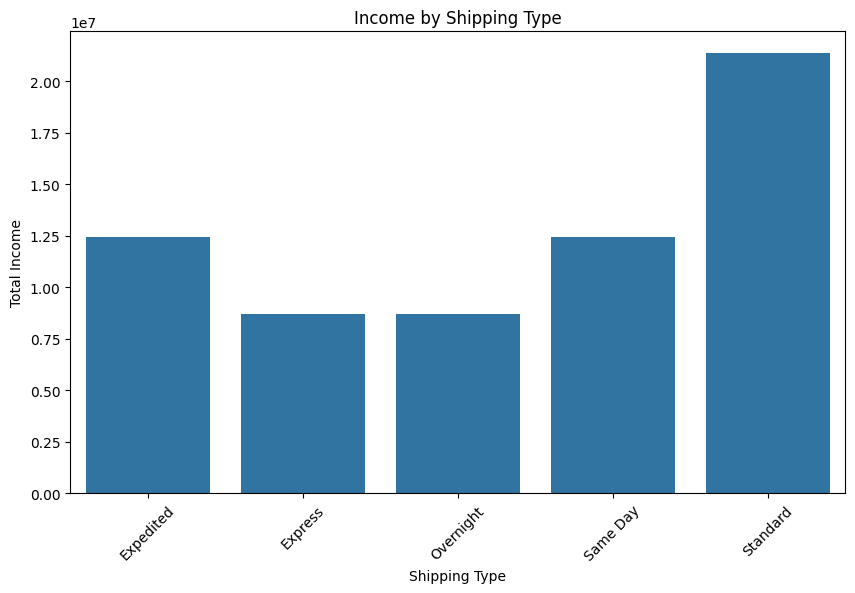

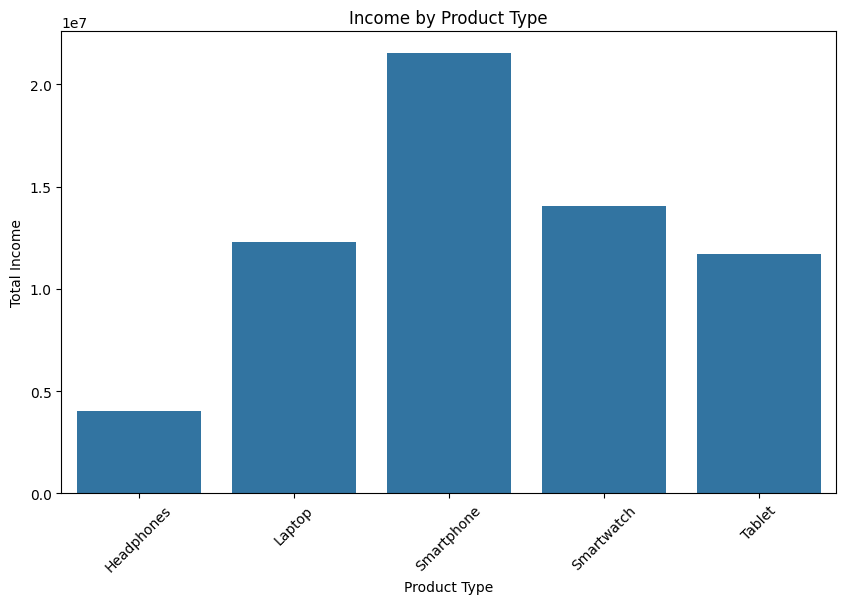

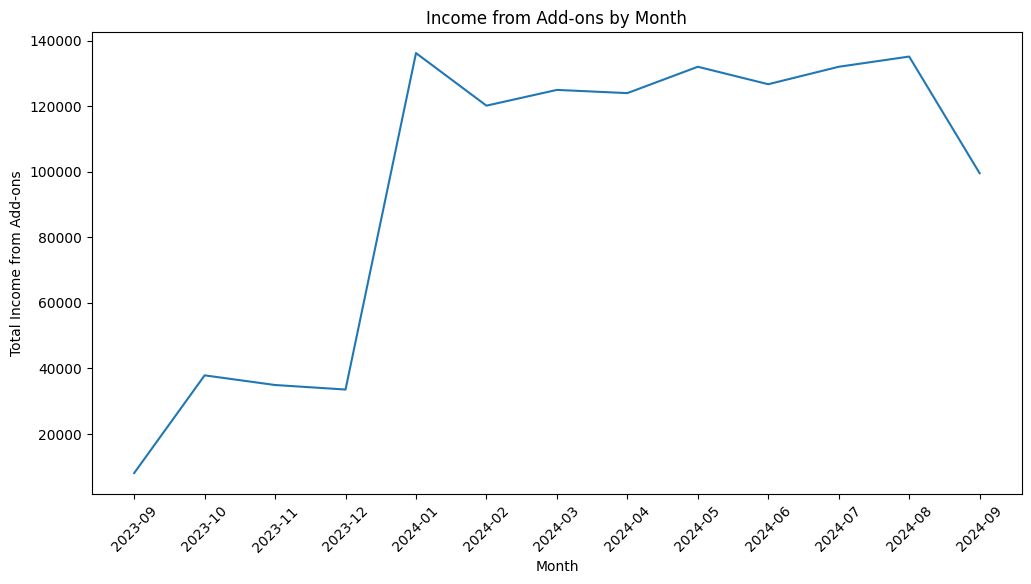

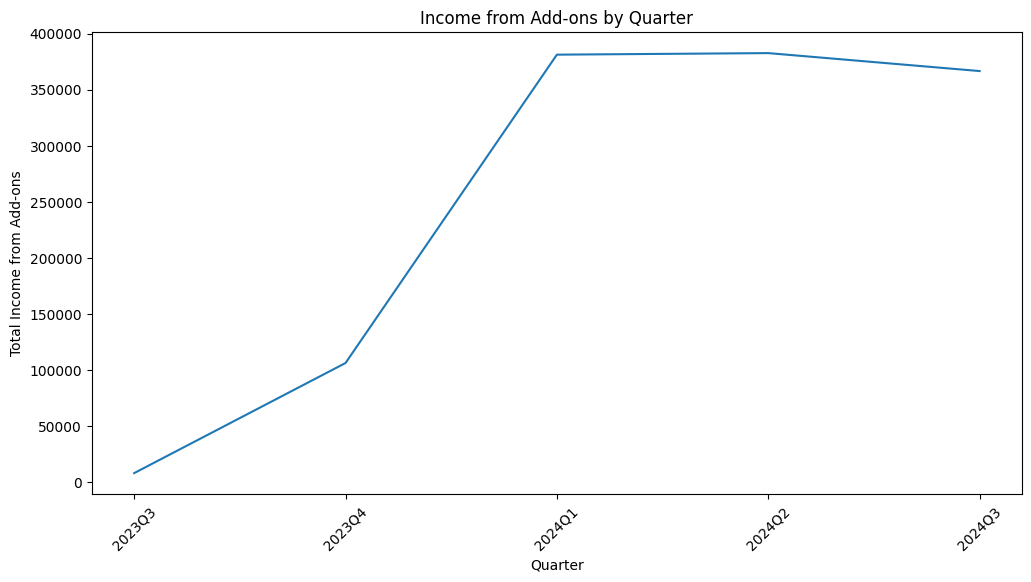

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

path = '/Users/nvoronov/Downloads/Electronic_sales_Sep2023-Sep2024.csv'

# Load the dataset
df = pd.read_csv(path)

# Группируем данные по Customer ID
customer_summary = df.groupby('Customer ID').agg(
    preferred_payment_method=('Payment Method', lambda x: x.mode()[0]),
    total_spent=('Total Price', 'sum'),
    total_addons_spent=('Add-on Total', 'sum')
).reset_index()

print(customer_summary)

# Преобразуем Purchase Date в datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Доход по каждому методу доставки
income_by_shipping = df.groupby('Shipping Type')['Total Price'].sum().reset_index()

# Доход по каждому типу продукта
income_by_product = df.groupby('Product Type')['Total Price'].sum().reset_index()

# Добавляем столбцы для месяца и квартала
df['Month'] = df['Purchase Date'].dt.to_period('M')
df['Quarter'] = df['Purchase Date'].dt.to_period('Q')

# Доход по дополнительным услугам за каждый месяц
income_by_addons_monthly = df.groupby(['Month'])['Add-on Total'].sum().reset_index()
# Доход по дополнительным услугам за каждый квартал
income_by_addons_quarterly = df.groupby(['Quarter'])['Add-on Total'].sum().reset_index()
# Визуализация дохода по каждому методу доставки
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping Type', y='Total Price', data=income_by_shipping)
plt.title('Income by Shipping Type')
plt.ylabel('Total Income')
plt.xlabel('Shipping Type')
plt.xticks(rotation=45)
plt.show()

# Визуализация дохода по каждому типу продукта
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Type', y='Total Price', data=income_by_product)
plt.title('Income by Product Type')
plt.ylabel('Total Income')
plt.xlabel('Product Type')
plt.xticks(rotation=45)
plt.show()

# Визуализация дохода по дополнительным услугам за месяц
income_by_addons_monthly['Month'] = income_by_addons_monthly['Month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Add-on Total', data=income_by_addons_monthly)
plt.title('Income from Add-ons by Month')
plt.ylabel('Total Income from Add-ons')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

# Визуализация дохода по дополнительным услугам за квартал
income_by_addons_quarterly['Quarter'] = income_by_addons_quarterly['Quarter'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Quarter', y='Add-on Total', data=income_by_addons_quarterly)
plt.title('Income from Add-ons by Quarter')
plt.ylabel('Total Income from Add-ons')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.show()